<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/a/a8/%D0%9B%D0%9E%D0%93%D0%9E_%D0%A8%D0%90%D0%94.png" width=500px/>
    <font>Python 2023</font><br/>
    <br/>
    <br/>
    <b style="font-size: 2em">Инструменты анализа данных numpy и pandas</b><br/>
    <br/>
    <font>Абасов Ислам</font><br/>
</center>

# NumPy

[numpy.org/doc/](https://numpy.org/doc/stable/)

Библеотека NumPy предоставляет следующие **возможности**: 
* работать с многомерными массивами (включая матрицы)
* производить быстрое вычисление математических функций на многомерных массивах

Ядром пакета NumPy является объект [ndarray](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html)

**Важные отличия** между NumPy arrays и Python sequences: 
* NumPy array имеет фиксированную длину, которая определяется в момент его создания (в отличие от Python lists, которые могут расти динамически)
* Элементы в NumPy array должны быть одного типа
* Можно выполнять операции непосредственно над NumPy arrays

**Сильные стороны** NumPy: 
* Vectorization 
* Broadcasting

**Мотивирующий пример**
![Imgur](https://i.imgur.com/z4GzOX6.png)

In [192]:
import numpy as np

## Способы создания Numpy arrays
* Конвертация из Python structures
* Генерация с помощью встроенных функций
* Чтение с диска


### Конвертация из Python structures

In [193]:
np.array([1, 2, 3, 4, 5])

array([1, 2, 3, 4, 5])

При конвертации можно задавать тип данных с помощью аргумента [dtype](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dtype.html): 

In [194]:
np.array([1, 2, 3, 4, 5], dtype=np.float32)

array([1., 2., 3., 4., 5.], dtype=float32)

Аналогичное преобразование:

In [195]:
np.float32([1, 2, 3, 4, 5])

array([1., 2., 3., 4., 5.], dtype=float32)

### Генерация Numpy arrays

* [arange](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) — аналог range из Python, которому можно передать нецелочисленный шаг
* [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) — способ равномерно разбить отрезок на n-1 интервал
* [logspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html) — способ разбить отрезок по логарифмической шкале
* [zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) — создаёт массив заполненный нулями заданной размерности
* [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html) — создаёт массив заполненный единицами заданной размерности
* [empty](https://docs.scipy.org/doc/numpy/reference/generated/numpy.empty.html) — создаёт массив неинициализированный никаким значением заданной размерности

In [6]:
np.arange(0, 5, 0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [7]:
np.linspace(0, 5, 11)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [8]:
np.logspace(0, 9, 10, base=2)

array([  1.,   2.,   4.,   8.,  16.,  32.,  64., 128., 256., 512.])

In [9]:
np.zeros((2, 2))

array([[0., 0.],
       [0., 0.]])

In [10]:
np.ones((2, 2))

array([[1., 1.],
       [1., 1.]])

In [196]:
np.empty((2, 2))

array([[ 18.75      , 236.42222222],
       [ 36.375     , 250.42222222]])

In [197]:
np.diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

Pазмеры массива храниться в поле **shape**, а количество размерностей - в **ndim**

In [199]:
array = np.ones((2, 3,))
print('Размерность массива - %s, количество размерностей - %d'%(array.shape, array.ndim))
array

Размерность массива - (2, 3), количество размерностей - 2


array([[1., 1., 1.],
       [1., 1., 1.]])

In [14]:
## Чему равень ndim и shape в следующих случаях
print(np.diag([1,2,3]).shape, np.diag([1,2,3]).ndim)
print(np.zeros((5, 5, 5)).shape, np.zeros((5, 5, 5)).ndim)

(3, 3) 2
(5, 5, 5) 3


Метод [reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) позволяет преобразовать размеры массива без изменения данных

In [207]:
array = np.arange(0, 6, 0.5)
array = array.reshape((2, 6))
array

array([[0. , 0.5, 1. , 1.5, 2. , 2.5],
       [3. , 3.5, 4. , 4.5, 5. , 5.5]])

Для того что бы развернуть многомерный массив в вектор, можно воспользоваться функцией [ravel](ravel)

In [208]:
array = np.ravel(array)
array

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5])

In [209]:
# Какие будут массивы?
print(np.ravel(np.diag([1,2])))
print(np.reshape(np.diag([1,2]), [1, 4]))

[1 0 0 2]
[[1 0 0 2]]


## Индексация

В NumPy работает привычная индексация Python, включая использование отрицательных индексов и срезов

In [210]:
print(array[0])
print(array[-1])
print(array[1:-1])
print(array[1:-1:2])
print(array[::-1])

0.0
5.5
[0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
[0.5 1.5 2.5 3.5 4.5]
[5.5 5.  4.5 4.  3.5 3.  2.5 2.  1.5 1.  0.5 0. ]


In [211]:
print(array.shape)

(12,)


In [212]:
print(array[None,0:, None].ndim, array[None,0:, None].shape)
array[None,0:, None]

3 (1, 12, 1)


array([[[0. ],
        [0.5],
        [1. ],
        [1.5],
        [2. ],
        [2.5],
        [3. ],
        [3.5],
        [4. ],
        [4.5],
        [5. ],
        [5.5]]])

**Замечание**: Индексы и срезы в многомерных массивах не нужно разделять квадратными скобками 

т.е. вместо ```matrix[i][j]``` нужно использовать ```matrix[i, j]```

В качестве индексов можно использовать массивы:

In [213]:
array[[0, 2, 4, 6, 8, 10]]

array([0., 1., 2., 3., 4., 5.])

In [214]:
array[[True, False, True, False, True, False, True, False, True, False, True, False]]

array([0., 1., 2., 3., 4., 5.])

In [219]:
# Что будет выведено?
x = np.array([[1, 2, 3]])
y = np.array([1, 2, 3])

print (x.shape, y.shape)

print(np.array_equal(x, y))
print(np.array_equal(x, y[None, :]))

(1, 3) (3,)
False
True


In [220]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [222]:
x[(x % 2 == 0) & (x > 5)]

array([6, 8])

In [225]:
print(x)
y = x[x>5] 
y *= 2
print(y)
print(x)

[ 0  1  2  3  4  5 12 14 16 18]
[24 28 32 36]
[ 0  1  2  3  4  5 12 14 16 18]


Для копирования в numpy есть метод copy

In [226]:
x.copy()

array([ 0,  1,  2,  3,  4,  5, 12, 14, 16, 18])

### Чтение данных с помощью функции [genfromtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html#numpy.genfromtxt)

In [49]:
with open('out.npz', 'wb') as f:
    np.save(f, x)
    
with open('out.npz', 'rb') as f:
    print(f.read())
    
with open('out.npz', 'rb') as f:
    y = np.load(f)
    print(y)    

b"\x93NUMPY\x01\x00v\x00{'descr': '<i8', 'fortran_order': False, 'shape': (10,), }                                                           \n\x00\x00\x00\x00\x00\x00\x00\x00\x04\x00\x00\x00\x00\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\x00\x0c\x00\x00\x00\x00\x00\x00\x00\x10\x00\x00\x00\x00\x00\x00\x00\x14\x00\x00\x00\x00\x00\x00\x00\x18\x00\x00\x00\x00\x00\x00\x00\x1c\x00\x00\x00\x00\x00\x00\x00 \x00\x00\x00\x00\x00\x00\x00$\x00\x00\x00\x00\x00\x00\x00"
[ 0  4  8 12 16 20 24 28 32 36]


In [227]:
iris = np.genfromtxt('iris_subset.txt', delimiter=', ', names=True, dtype=[('sepal_length_in_cm', 'f8'), 
                                                                          ('sepal_width_in_cm', 'f8'), 
                                                                          ('petal_length_in_cm', 'f8'), 
                                                                          ('petal_width_in_cm', 'f8'),
                                                                          ('class', 'U10')])
iris

array([(1.000e+00,   1. ,   10.,   121. , 'setosa'),
       (1.000e+00, 314. ,   13.,   121. , 'versicolor'),
       (1.134e+03,   1. ,  103.,  1421. , 'setosa'),
       (1.000e+00, 141. ,   10.,   121. , 'versicolor'),
       (1.440e+02,   1. , 4582., 13481. , 'versicolor'),
       (1.000e+00,  13.3,   10.,   121. , 'versicolor'),
       (1.141e+03,   1. , 1341.,  1231.1, 'setosa'),
       (7.320e+02, 131. ,  139.,    92.1, 'setosa')],
      dtype=[('sepal_length_in_cm', '<f8'), ('sepal_width_in_cm', '<f8'), ('petal_length_in_cm', '<f8'), ('petal_width_in_cm', '<f8'), ('class', '<U10')])

Значения строки можно запросить по индексу, а значения колонки по её названию

In [228]:
print('Описание первого элемента: %s'%iris[0])
print('Значения столбца sepal_length_in_cm: %s'%iris['sepal_length_in_cm'])

Описание первого элемента: (1., 1., 10., 121., 'setosa')
Значения столбца sepal_length_in_cm: [1.000e+00 1.000e+00 1.134e+03 1.000e+00 1.440e+02 1.000e+00 1.141e+03
 7.320e+02]


In [229]:
sepal_length_setosa = iris['sepal_length_in_cm'][iris['class'] == 'setosa']
sepal_length_versicolor = iris['sepal_length_in_cm'][iris['class'] == 'versicolor']

print('Значения слтобца sepal_length_in_cm\n\tclass setosa: %s\n\tclass versicolor: %s'%(sepal_length_setosa, 
                                                                                         sepal_length_versicolor))

Значения слтобца sepal_length_in_cm
	class setosa: [1.000e+00 1.134e+03 1.141e+03 7.320e+02]
	class versicolor: [  1.   1. 144.   1.]


При чтение данных из файла можно пропускать строки в конце и в начале, используя **skip_header** и **skip_footer**, а также брать только нужные столбцы - **usecols**

In [230]:
iris_class = np.genfromtxt('iris_subset.txt', delimiter=', ', skip_header=1, usecols=4, dtype='U10')
iris_class

array(['setosa', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'setosa'], dtype='<U10')

In [231]:
iris_features = np.genfromtxt('iris_subset.txt', delimiter=', ', skip_header=1, usecols=range(4))
iris_features

array([[1.0000e+00, 1.0000e+00, 1.0000e+01, 1.2100e+02],
       [1.0000e+00, 3.1400e+02, 1.3000e+01, 1.2100e+02],
       [1.1340e+03, 1.0000e+00, 1.0300e+02, 1.4210e+03],
       [1.0000e+00, 1.4100e+02, 1.0000e+01, 1.2100e+02],
       [1.4400e+02, 1.0000e+00, 4.5820e+03, 1.3481e+04],
       [1.0000e+00, 1.3300e+01, 1.0000e+01, 1.2100e+02],
       [1.1410e+03, 1.0000e+00, 1.3410e+03, 1.2311e+03],
       [7.3200e+02, 1.3100e+02, 1.3900e+02, 9.2100e+01]])

In [233]:
features_setosa = iris_features[iris_class == 'setosa']
features_versicolor = iris_features[iris_class == 'versicolor']

Операции в NumPy можно производить непосредственно над векторами одинаковой размерности без использования циклов

Например, вычисление поэлементной разности между векторами выглядит следующим образом:

In [234]:
sepal_length_versicolor - sepal_length_setosa

array([    0., -1133.,  -997.,  -731.])

Аналогчино для многомерных массивов

In [235]:
features_versicolor - features_setosa

array([[ 0.00000e+00,  3.13000e+02,  3.00000e+00,  0.00000e+00],
       [-1.13300e+03,  1.40000e+02, -9.30000e+01, -1.30000e+03],
       [-9.97000e+02,  0.00000e+00,  3.24100e+03,  1.22499e+04],
       [-7.31000e+02, -1.17700e+02, -1.29000e+02,  2.89000e+01]])

<div class="alert alert-info">
    <b>Замечание:</b> Все арифметические операции над массивами одинаковой размерности производятся поэлементно
</div>

## [Broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html)

Broadcasting снимает правило одной размерности и позволяет производить арифметические операции над массивами разных, но всё-таки созгласованных размерностей. Простейшим примером является умножение вектора на число:

![Imgur](https://i.imgur.com/tE3ZCWG.gif)

In [237]:
2*np.arange(1, 4)

array([2, 4, 6])

Правило согласования размерностей выражается в одном предложение: 

```In order to broadcast, the size of the trailing axes for both arrays in an operation must either be the same size or one of them must be one```

Если количество размерностей не совпадают, то к массиву меньшей размерности добавляются фиктивные размерности "слева", например:
```
a  = np.ones((2,3,4))
b = np.ones(4)
c = a * b # here a.shape=(2,3,4) and b.shape is considered to be (1,1,4)
```

Прибавим к каждой строчки матрицы один и тот же вектор:

![Imgur](https://i.imgur.com/VsP2dqT.gif)

In [238]:
np.array([[0, 0, 0], [10, 10, 10], [20, 20, 20], [30, 30, 30]]) + np.arange(3)

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

Теперь если мы хотим, проделать тот же трюк но со столбцами, то мы не можем просто добавить вектор состоящий из 4 элементов т.к. в данном случае размеры будут не согласованы

![Imgurl](https://i.imgur.com/9LvGoeL.gif)

Сначала нужно преоброзовать вектор к виду:

In [60]:
np.arange(4)[:, np.newaxis]

array([[0],
       [1],
       [2],
       [3]])

А затем к нему добавить матрицу:

In [239]:
np.arange(4)[:, np.newaxis]+np.array([[0, 0, 0], [10, 10, 10], [20, 20, 20], [30, 30, 30]])

array([[ 0,  0,  0],
       [11, 11, 11],
       [22, 22, 22],
       [33, 33, 33]])

Если нужно перемножить многомерные массивы не поэлеметно, а по правилу перемножения матриц, то следует воспользоваться [np.dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html)

Транспонирование производится с помощью array**.T**

Так же в NumPy реализованно много полезных операций для работы с массивами: [np.min](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.min.html), [np.max](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.max.html), [np.sum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html), [np.mean](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html) и т.д.

<div class="alert alert-info">
    <b>Замечание:</b> В каждой из перечисленных функций есть параметр **axis**, который указывает по какому измерению производить данную операцию. По умолчанию операция производится по всем значениям массива

Например:
</div>

In [240]:
print('Среднее значение всех значений класса versicolor: %s'%np.mean(features_versicolor))
print('Среднее значение каждого признака класса versicolor: %s'%np.mean(features_versicolor, axis=1))

Среднее значение всех значений класса versicolor: 1192.20625
Среднее значение каждого признака класса versicolor: [ 112.25    68.25  4552.      36.325]


Теперь эффективно посчитаем $\frac{1}{n} \sum\limits_{i=1}^n |x_i-y_i|$ для каждой пары $(x, y)$, где $x$ - вектор признаков объекта из класса setosa, а $y$ - вектор признаков объекта из класса versicolor

In [241]:
np.mean(np.abs(features_setosa - features_versicolor[:, np.newaxis]), axis=2)

array([[7.900000e+01, 7.090000e+02, 9.727750e+02, 2.672250e+02],
       [3.500000e+01, 6.665000e+02, 9.302750e+02, 2.247250e+02],
       [4.518750e+03, 4.382250e+03, 4.121975e+03, 4.637475e+03],
       [3.075000e+00, 6.345750e+02, 8.983500e+02, 2.516500e+02]])

### Операции

In [242]:
x = np.arange(40).reshape(5, 2, 4)
print(x)

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]

 [[16 17 18 19]
  [20 21 22 23]]

 [[24 25 26 27]
  [28 29 30 31]]

 [[32 33 34 35]
  [36 37 38 39]]]


In [243]:
print(x.mean())
print(np.mean(x))

19.5
19.5


In [65]:
x.mean(axis=0)

array([[16., 17., 18., 19.],
       [20., 21., 22., 23.]])

In [66]:
x.mean(axis=1)

array([[ 2.,  3.,  4.,  5.],
       [10., 11., 12., 13.],
       [18., 19., 20., 21.],
       [26., 27., 28., 29.],
       [34., 35., 36., 37.]])

In [244]:
x.mean(axis=2)

array([[ 1.5,  5.5],
       [ 9.5, 13.5],
       [17.5, 21.5],
       [25.5, 29.5],
       [33.5, 37.5]])

In [245]:
x.mean(axis=(0,2))

array([17.5, 21.5])

In [247]:
x.mean(axis=(0,1,2))

19.5

### Конкатенация многомерных массивов

Конкатенировать несколько массивом можно с помощью функций **np.concatenate, np.hstack, np.vstack, np.dstack**

In [248]:
x = np.arange(10).reshape(5, 2)
y = np.arange(100, 120).reshape(5, 4)

In [249]:
x

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [250]:
y

array([[100, 101, 102, 103],
       [104, 105, 106, 107],
       [108, 109, 110, 111],
       [112, 113, 114, 115],
       [116, 117, 118, 119]])

In [73]:
np.hstack((x, y))

array([[  0,   1, 100, 101, 102, 103],
       [  2,   3, 104, 105, 106, 107],
       [  4,   5, 108, 109, 110, 111],
       [  6,   7, 112, 113, 114, 115],
       [  8,   9, 116, 117, 118, 119]])

In [251]:
x = np.ones([2, 3])
y = np.zeros([2, 2])

In [252]:
# Какой будет результат
print(np.hstack((x,y)).shape)
print(np.vstack((x,y)).shape)

(2, 5)


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 3 and the array at index 1 has size 2

In [253]:
p = np.arange(1).reshape([1, 1, 1, 1])
p

array([[[[0]]]])

In [254]:
print("vstack: ", np.vstack((p, p)).shape)
print("hstack: ", np.hstack((p, p)).shape)
print("dstack: ", np.dstack((p, p)).shape)
print("concatenate: ", np.concatenate((p, p), axis=3).shape)

vstack:  (2, 1, 1, 1)
hstack:  (1, 2, 1, 1)
dstack:  (1, 1, 2, 1)
concatenate:  (1, 1, 1, 2)


### Типы

In [255]:
x = [1, 2, 70000]

In [256]:
np.array(x, dtype=np.float32)

array([1.e+00, 2.e+00, 7.e+04], dtype=float32)

In [257]:
np.array(x, dtype=np.uint16)

/var/folders/8v/lkqtp6ws7t1fvgzb6q5v0c293ff_z_/T/ipykernel_21411/2771282312.py:1: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 70000 to uint16 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)`
will give the desired result (the cast overflows).
  np.array(x, dtype=np.uint16)


array([   1,    2, 4464], dtype=uint16)

In [258]:
np.array(x, dtype=np.unicode_)

array(['1', '2', '70000'], dtype='<U5')

### [Типизация](https://numpy.org/devdocs/reference/typing.html)

In [259]:
import numpy.typing as npt

* npt.ArrayLike - объекты, которые могут быть скастованы в ndarray (константы, последовательности, объекты с методом \__array__)
* npt.DTypeLike - объекты, которые могут быть скастованы в np.dtype
* npt.NDArray - массивы np.ndarray с определённым типом и неопределённой размерностью

In [260]:
def as_array(a: npt.ArrayLike) -> npt.NDArray[np.int_]:
    return np.array(a)

arr = as_array([1,2, 3])

In [261]:
%%typecheck

import numpy as np
import numpy.typing as npt

def as_array(a: npt.ArrayLike) -> npt.NDArray[np.int_]:
    return np.array(a)

as_array([1,2,3])

Success: no issues found in 1 source file



In [92]:
%%typecheck

import numpy as np
import numpy.typing as npt

def as_array(a: npt.ArrayLike) -> list[float]:
    return list(a)

as_array([1,2,3])

<string>:7: error: Argument 1 to "list" has incompatible type "_SupportsArray[dtype[Any]] | _NestedSequence[_SupportsArray[dtype[Any]]] | bool | int | float | complex | str | bytes | _NestedSequence[bool | int | float | complex | str | bytes]"; expected "Iterable[float]"  [arg-type]
Found 1 error in 1 file (checked 1 source file)



In [191]:
%%typecheck

import numpy as np
import numpy.typing as npt

def as_array(a: npt.ArrayLike) -> npt.NDArray[np.float_]:
    return np.array(a, dtype=np.int64)

as_array([1,2,3])

Success: no issues found in 1 source file



In [262]:
%%typecheck

import numpy as np
import numpy.typing as npt

def as_array(a: npt.ArrayLike) -> npt.NDArray[np.float_]:
    return np.array(a)

class A:
    pass

as_array(A())

<string>:12: error: Argument 1 to "as_array" has incompatible type "A"; expected "_SupportsArray[dtype[Any]] | _NestedSequence[_SupportsArray[dtype[Any]]] | bool | int | float | complex | str | bytes | _NestedSequence[bool | int | float | complex | str | bytes]"  [arg-type]
Found 1 error in 1 file (checked 1 source file)



### Функциональное программирование

In [263]:
def f(value):
    return np.sqrt(value)

In [264]:
print(np.apply_along_axis(f, 0, np.arange(10)))

[0.         1.         1.41421356 1.73205081 2.         2.23606798
 2.44948974 2.64575131 2.82842712 3.        ]


In [127]:
vf = np.vectorize(f)

In [265]:
%%timeit 
vf(np.arange(100000))

51.1 ms ± 486 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [266]:
%%timeit 
np.apply_along_axis(f, 0, np.arange(100000)) 

150 µs ± 3.9 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [268]:
%%timeit 
np.array([f(v) for v in np.arange(100000)])

53 ms ± 232 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Pandas

[pandas.pydata.org/docs/](https://pandas.pydata.org/docs/)

Подключаем библиотеку Pandas, предназначенную для считывания, предобработки и быстрой визуализации данных, а также для простой аналитики.

<div class="alert alert-info">
    <b>Замечание:</b> Существует быстрый способ читать\писать табличные данные. Подробнее: <a href='https://habr.com/ru/company/wrike/blog/279797/'> паркет </a>

</div>


In [349]:
import pandas as pd
df = pd.read_csv("titanic.csv")

In [350]:
df.head(3)

,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
view = df[df['Sex'] == 'female']

In [355]:
list(((df['Sex'] == 'female') & (df['Age'] > 30)).index)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155]

In [351]:
df[(df['Sex'] == 'female') & (df['Age'] > 30)].index

Index([1, 3, 11, 15, 18, 25, 40, 52, 61, 85, 98, 123, 132], dtype='int64')

In [346]:
df.drop(index=(df[(df['Sex'] == 'female') & (df['Age'] > 30)].index),axis=1, inplace=True)

In [332]:
df.loc[78]

PassengerId                      79
Survived                          1
Pclass                            2
Lname                      Caldwell
Name            Master. Alden Gates
Sex                            male
Age                            0.83
SibSp                             0
Parch                             2
Ticket                       248738
Fare                           29.0
Cabin                           NaN
Embarked                          S
Name: 78, dtype: object

In [334]:
df.iloc[0]

PassengerId                      79
Survived                          1
Pclass                            2
Lname                      Caldwell
Name            Master. Alden Gates
Sex                            male
Age                            0.83
SibSp                             0
Parch                             2
Ticket                       248738
Fare                           29.0
Cabin                           NaN
Embarked                          S
Name: 78, dtype: object

In [139]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,156.000000,156.000000,156.000000,126.000000,156.000000,156.000000,156.000000
mean,78.500000,0.346154,2.423077,28.141508,0.615385,0.397436,28.109587
std,45.177428,0.477275,0.795459,14.613880,1.056235,0.870146,39.401047
min,1.000000,0.000000,1.000000,0.830000,0.000000,0.000000,6.750000
25%,39.750000,0.000000,2.000000,19.000000,0.000000,0.000000,8.003150
50%,78.500000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,117.250000,1.000000,3.000000,35.000000,1.000000,0.000000,30.371850
max,156.000000,1.000000,3.000000,71.000000,5.000000,5.000000,263.000000


In [271]:
df[["Sex", "Cabin"]].describe()

,Sex,Cabin
count,156,31
unique,2,28
top,male,C23 C25 C27
freq,100,2


### Срезы в DataFrame

### Индексация

In [273]:
df.sort_values("Age", inplace=True)

In [274]:
df.head(3)

,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,Caldwell,Master. Alden Gates,male,0.83,0,2,248738,29.000,NaN,S
119,120,0,3,Andersson,Miss. Ellis Anna Maria,female,2.00,4,2,347082,31.275,NaN,S
7,8,0,3,Palsson,Master. Gosta Leonard,male,2.00,3,1,349909,21.075,NaN,S


In [142]:
df.iloc[78]

PassengerId                                         54
Survived                                             1
Pclass                                               2
Lname                                       Faunthorpe
Name            Mrs. Lizzie (Elizabeth Anne Wilkinson)
Sex                                             female
Age                                               29.0
SibSp                                                1
Parch                                                0
Ticket                                            2926
Fare                                              26.0
Cabin                                              NaN
Embarked                                             S
Name: 53, dtype: object

In [275]:
df.loc[78]

PassengerId                      79
Survived                          1
Pclass                            2
Lname                      Caldwell
Name            Master. Alden Gates
Sex                            male
Age                            0.83
SibSp                             0
Parch                             2
Ticket                       248738
Fare                           29.0
Cabin                           NaN
Embarked                          S
Name: 78, dtype: object

In [277]:
df.loc[[78, 79, 100], ["Age", "Cabin"]]

,Age,Cabin
78,0.83,NaN
79,30.00,NaN
100,28.00,NaN


Если хотите модифицировать данные среза, не меняя основной таблицы, нужно сделать копию.

In [278]:
df_slice_copy = df.loc[[78, 79, 100], ["Age", "Cabin"]].copy()

In [279]:
df_slice_copy[:] = 3

In [280]:
df_slice_copy

,Age,Cabin
78,3.0,3
79,3.0,3
100,3.0,3


Если хотите менять основную таблицу, то используйте loc

In [281]:
df.head(3)

,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,Caldwell,Master. Alden Gates,male,0.83,0,2,248738,29.000,NaN,S
119,120,0,3,Andersson,Miss. Ellis Anna Maria,female,2.00,4,2,347082,31.275,NaN,S
7,8,0,3,Palsson,Master. Gosta Leonard,male,2.00,3,1,349909,21.075,NaN,S


In [283]:
some_slice = df["Age"].isin([20, 25,30])
df.loc[some_slice, "Fare"] = df.loc[some_slice, "Fare"] * 10

Так лучше не делать:

In [150]:
slice_df = df[some_slice]
slice_df["Fare"] = slice_df["Fare"] * 10

/var/folders/8v/lkqtp6ws7t1fvgzb6q5v0c293ff_z_/T/ipykernel_21411/1355601167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slice_df["Fare"] = slice_df["Fare"] * 10


Получить значения только нужных столбцов можно передав в ```[]``` название столбца (или список названий столбцов).

**Замечание:** Если передаём название одного столбца, то получаем объект класса [pandas.Series](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html), а если список названий столбцов, то получаем  [pandas.DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html), чтобы получить [numpy.array](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html) обратитесь к полю **values**.

Series и DataFrame имеют много общих методов

In [284]:
df["Age"].head(5)

78     0.83
119    2.00
7      2.00
16     2.00
43     3.00
Name: Age, dtype: float64

In [285]:
df[["Age"]].head(5)

,Age
78,0.83
119,2.00
7,2.00
16,2.00
43,3.00


### pd.Series

Одномерные срезы датафреймов имеют тип pd.Series.

Можно получить np.array из pd.Series, но вы не хотите этого делать.

In [286]:
df["Age"].head(5).values

array([0.83, 2.  , 2.  , 2.  , 3.  ])

Можно достать и индекс

In [287]:
df["Age"].head(5).index

Index([78, 119, 7, 16, 43], dtype='int64')

Создаются они примерно также, как np.array. Опционально указывается индекс

In [288]:
pd.Series([1, 2, 3], index=["Red", "Green", "Blue"])

Red      1
Green    2
Blue     3
dtype: int64

In [289]:
pd.Series(1, index=["Red", "Green", "Blue"])

Red      1
Green    1
Blue     1
dtype: int64

In [290]:
pd.Series([1, 2, 3], index=["Red", "Green", "Blue"])

Red      1
Green    2
Blue     3
dtype: int64

Series можно перевести в DataFrame

In [291]:
s = pd.Series([1, 2, 3], index=["Red", "Green", "Blue"])
s.to_frame("Values")

,Values
Red,1
Green,2
Blue,3


In [292]:
s.loc["Red"]

1

In [293]:
s.iloc[0]

1

### [Объединение таблиц](http://pandas.pydata.org/pandas-docs/stable/merging.html)

In [294]:
df1 = df[["Age", "Parch"]].copy()
df2 = df[["Ticket", "Fare"]].copy()

In [295]:
df1.join(df2).head(5)

,Age,Parch,Ticket,Fare
78,0.83,2,248738,29.0000
119,2.00,2,347082,31.2750
7,2.00,1,349909,21.0750
16,2.00,1,382652,29.1250
43,3.00,2,SC/Paris 2123,41.5792


In [296]:
df1 = df[["Age", "Parch", "PassengerId"]].copy()
df2 = df[["Ticket", "Fare", "PassengerId"]].copy()

In [41]:
pd.merge(df1, df2, on=["PassengerId"]).head(5)

,Age,Parch,PassengerId,Ticket,Fare
0,0.83,2,79,248738,29.0000
1,2.00,2,120,347082,31.2750
2,2.00,1,8,349909,21.0750
3,2.00,1,17,382652,29.1250
4,3.00,2,44,SC/Paris 2123,41.5792


In [298]:
pd.merge(df1, df2, on=["PassengerId"], how="inner").head(5)

,Age,Parch,PassengerId,Ticket,Fare
0,0.83,2,79,248738,29.0000
1,2.00,2,120,347082,31.2750
2,2.00,1,8,349909,21.0750
3,2.00,1,17,382652,29.1250
4,3.00,2,44,SC/Paris 2123,41.5792


### Группировка

In [299]:
print("Pclass 1: ", df[df["Pclass"] == 1]["Age"].mean())
print("Pclass 2: ", df[df["Pclass"] == 2]["Age"].mean())
print("Pclass 3: ", df[df["Pclass"] == 3]["Age"].mean())

Pclass 1:  38.111111111111114
Pclass 2:  28.114827586206893
Pclass 3:  24.307142857142857


In [300]:
df.groupby(["Pclass"])[["Age"]].mean()

,Age
Pclass,
1,38.111111
2,28.114828
3,24.307143


In [301]:
df.groupby(["Survived", "Pclass"])

In [302]:
df.groupby(["Survived", "Pclass"])["PassengerId"].count()

Survived  Pclass
0         1         18
          2         16
          3         68
1         1         12
          2         14
          3         28
Name: PassengerId, dtype: int64

In [303]:
df.groupby(["Survived", "Pclass"])[["PassengerId", "Cabin"]].count()

PassengerId  Cabin
Survived Pclass                    
0        1                18     12
         2                16      1
         3                68      1
1        1                12     12
         2                14      3
         3                28      2

In [304]:
df.groupby(["Survived", "Pclass"])[["PassengerId", "Fare"]].describe()

PassengerId                                              
                      count        mean        std   min    25%    50%   
Survived Pclass                                                          
0        1             18.0   82.555556  44.501450   7.0  40.75   88.5  \
         2             16.0  107.187500  44.842270  21.0  72.50  122.0   
         3             68.0   80.161765  43.375352   1.0  46.75   84.0   
1        1             12.0   60.083333  50.118874   2.0  21.00   54.5   
         2             14.0   62.000000  39.240874  10.0  27.50   58.0   
         3             28.0   71.607143  45.525198   3.0  32.00   72.0   

                                Fare                                    
                    75%    max count        mean         std      min   
Survived Pclass                                                         
0        1       117.00  156.0  18.0   80.035183   66.109719  27.7208  \
         2       145.25  151.0  16.0  106.680725  318.829305  10.5000   
         3       114.25  155.0  68.0   72.406113  210.709043   6.7500   
1        1        91.25  152.0  12.0   78.702075   66.649342  26.2833   
         2        83.50  134.0  14.0   20.707143    9.671110  10.5000   
         3       108.50  147.0  28.0   57.290925  233.490766   7.1417   

                                                            
                       25%       50%        75%        max  
Survived Pclass                                             
0        1       51.896875  61.27710  78.721875   263.0000  
         2       12.881250  23.50000  31.740600  1300.0000  
         3        7.895800   8.30830  20.700000   982.5000  
1        1       35.500000  64.97915  77.546900   263.0000  
         2       13.000000  19.50000  27.312500    41.5792  
         3        7.768750   7.97710  15.850000  1247.5000

### Работа с timestamp'ами

<div class="alert alert-info">
    <b>Замечание:</b> Про питоновский timestamp у вас была\будет лекция. Очень рекомендую её посмотреть.
</div>

In [305]:
tdf = df.copy()
tdf["ts"] = range(1560000000, 1560000000 + tdf.shape[0])

In [306]:
tdf.head(2)

,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ts
78,79,1,2,Caldwell,Master. Alden Gates,male,0.83,0,2,248738,29.000,NaN,S,1560000000
119,120,0,3,Andersson,Miss. Ellis Anna Maria,female,2.00,4,2,347082,31.275,NaN,S,1560000001


In [307]:
tdf["ts"] = pd.to_datetime(tdf["ts"], unit="s")

In [309]:
tdf.head(2)

,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ts
78,79,1,2,Caldwell,Master. Alden Gates,male,0.83,0,2,248738,29.000,NaN,S,2019-06-08 13:20:00
119,120,0,3,Andersson,Miss. Ellis Anna Maria,female,2.00,4,2,347082,31.275,NaN,S,2019-06-08 13:20:01


In [310]:
tdf.set_index("ts", inplace=True)

In [312]:
tdf.resample("15s").sum()[["PassengerId", "Survived", "Pclass", "Sex"]]

,PassengerId,Survived,Pclass,Sex
ts,,,,
2019-06-08 13:20:00,867,6,42,malefemalemalemalefemalemalefemalefemalemalefe...
2019-06-08 13:20:15,1373,5,39,femalefemalefemalemalemalefemalefemalefemalefe...
2019-06-08 13:20:30,1159,3,38,malefemalemalemalemalefemalemalemalemalemalema...
2019-06-08 13:20:45,1569,6,34,femalefemalemalemalemalemalefemalemalemalemale...
2019-06-08 13:21:00,1073,4,37,malemalefemalemalemalemalefemalefemalefemalema...
2019-06-08 13:21:15,1368,8,37,femalefemalemalefemalemalefemalefemalemalemale...
2019-06-08 13:21:30,828,6,31,femalemalemalemalefemalemalemalemalefemalefema...
2019-06-08 13:21:45,1531,2,26,malemalemalemalemalemalefemalemalefemalemalema...
2019-06-08 13:22:00,642,7,35,femalemalemalemalemalemalemalemalefemalemalefe...


In [55]:
tdf.resample("15s").mean()

TypeError: Could not convert CaldwellAnderssonPalssonRiceLarocheSkoogSandstromWestPanulaPalssonFordGoodwinNicola-YarredNasserVestrom to numeric

In [157]:
tdf.resample("1T").sum()[["PassengerId", "Survived", "Pclass", "Sex"]]

,PassengerId,Survived,Pclass,Sex
ts,,,,
2019-06-08 13:20:00,4968,20,153,malefemalemalemalefemalemalefemalefemalemalefe...
2019-06-08 13:21:00,4800,20,131,malemalemalefemalemalemalefemalefemalefemalema...
2019-06-08 13:22:00,2478,14,94,femalemalemalemalemalemalemalemalefemalemalefe...


### Rolling функции

![Imgurl](https://i2.wp.com/datascienceparichay.com/wp-content/uploads/2021/11/rolling-sum-pandas.png?fit=900%2C520&ssl=1)

In [313]:
tdf.sort_index(inplace=True)

In [314]:
tdf[["Fare"]].rolling(window=5).mean().head(10)

,Fare
ts,
2019-06-08 13:20:00,NaN
2019-06-08 13:20:01,NaN
2019-06-08 13:20:02,NaN
2019-06-08 13:20:03,NaN
2019-06-08 13:20:04,30.41084
2019-06-08 13:20:05,30.19084
2019-06-08 13:20:06,27.27584
2019-06-08 13:20:07,28.61084
2019-06-08 13:20:08,30.72334


Можно делать вместе с groupby

In [315]:
rol = tdf[["Sex", "Fare"]].groupby(["Sex"]).rolling(window=5).mean()

In [316]:
rol.head(100)

Fare
Sex    ts                           
female 2019-06-08 13:20:01       NaN
       2019-06-08 13:20:04       NaN
       2019-06-08 13:20:06       NaN
       2019-06-08 13:20:07       NaN
       2019-06-08 13:20:09  27.67584
...                              ...
male   2019-06-08 13:21:09  19.71750
       2019-06-08 13:21:10  34.41916
       2019-06-08 13:21:11  33.10748
       2019-06-08 13:21:12  36.09248
       2019-06-08 13:21:13  35.97916

[100 rows x 1 columns]

In [163]:
rol.loc['male'].head(10)

,Fare
ts,
2019-06-08 13:20:00,NaN
2019-06-08 13:20:02,NaN
2019-06-08 13:20:03,NaN
2019-06-08 13:20:05,NaN
2019-06-08 13:20:08,29.35750
2019-06-08 13:20:11,32.93750
2019-06-08 13:20:12,30.97084
2019-06-08 13:20:18,26.98918
2019-06-08 13:20:19,28.28418


### Работа со строками

In [318]:
df["Name"].str.lower()\
          .str.replace(",", " ")\
          .str.split(".").str[1]\
          .head(10)

78                    alden gates
119              ellis anna maria
7                   gosta leonard
16                         eugene
43      simonne marie anne andree
63                         harald
10                 marguerite rut
58               constance mirium
50                     juha niilo
24                 torborg danira
Name: Name, dtype: object

### Работа с NaN'ами

In [319]:
df["Cabin"].head(15)

78     NaN
119    NaN
7      NaN
16     NaN
43     NaN
63     NaN
10      G6
58     NaN
50     NaN
24     NaN
147    NaN
59     NaN
125    NaN
39     NaN
14     NaN
Name: Cabin, dtype: object

In [320]:
df["Cabin"].dropna().head(15)

10              G6
136            D47
27     C23 C25 C27
102            D26
151             C2
88     C23 C25 C27
97         D10 D12
118        B58 B60
139            B86
75           F G73
23              A6
66             F33
123           E101
21             D56
3             C123
Name: Cabin, dtype: object

In [321]:
df["Cabin"].fillna(3).head(5)

78     3
119    3
7      3
16     3
43     3
Name: Cabin, dtype: object

In [322]:
df["Cabin"].fillna(method="bfill").head(15)

78      G6
119     G6
7       G6
16      G6
43      G6
63      G6
10      G6
58     D47
50     D47
24     D47
147    D47
59     D47
125    D47
39     D47
14     D47
Name: Cabin, dtype: object

In [323]:
pd.isna(df["Cabin"]).head(10)

78      True
119     True
7       True
16      True
43      True
63      True
10     False
58      True
50      True
24      True
Name: Cabin, dtype: bool

### Функция apply

In [170]:
def dummpy_example(row):
    return row['Sex'] * row['Pclass']

df['dummy_example'] = df.apply(dummpy_example, axis=1)
df.tail(3)

,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,dummy_example
128,129,1,3,Peter,Miss. Anna,female,NaN,1,1,2668,22.3583,F E69,C,femalefemalefemale
140,141,0,3,Boulos,Mrs. Joseph (Sultana),female,NaN,0,2,2678,15.2458,NaN,C,femalefemalefemale
154,155,0,3,Olsen,Mr. Ole Martin,male,NaN,0,0,Fa 265302,7.3125,NaN,S,malemalemale


<div class="alert alert-warning">
    <b>Вот так лучше не делать.</b>
</div>

In [171]:
for index, row in df.iterrows():
    if row['Sex'] == 'male':
        df.loc[index, 'PassengerId'] = row['Pclass'] * 10
    else:
        df.loc[index, 'PassengerId'] = row['Pclass'] * 2
        
df.head(2)

,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,dummy_example
78,20,1,2,Caldwell,Master. Alden Gates,male,0.83,0,2,248738,29.000,NaN,S,malemale
119,6,0,3,Andersson,Miss. Ellis Anna Maria,female,2.00,4,2,347082,31.275,NaN,S,femalefemalefemale


### Визуализация

<Axes: xlabel='ts'>

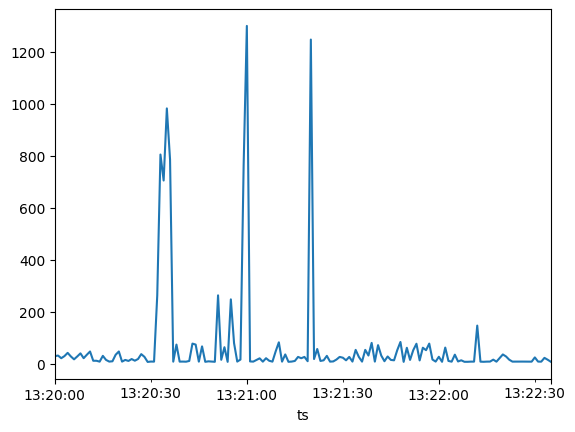

In [324]:
tdf["Fare"].plot()

<Axes: xlabel='ts'>

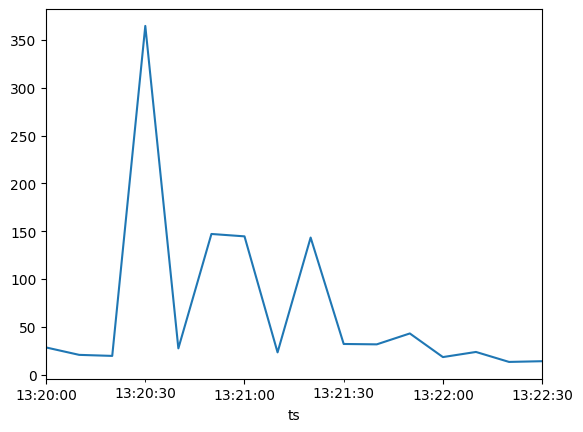

In [328]:
tdf["Fare"].resample("10s").mean().plot()

<Axes: >

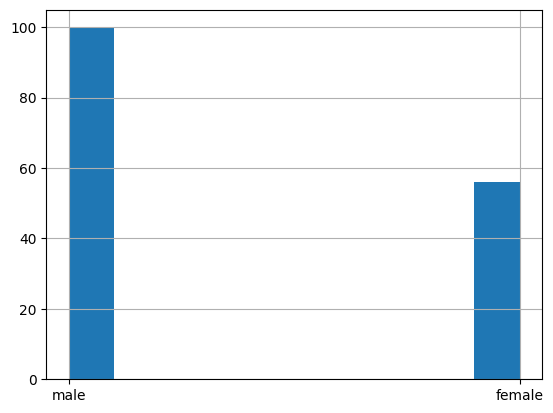

In [329]:
tdf["Sex"].hist()